In [33]:
print("Successfully Work notebook")


Successfully Work notebook


- API Reference: https://platform.openai.com/docs/api-reference/chat/create

In [38]:
import os
import openai
from dotenv import load_dotenv

In [39]:
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")  # ✅ নাম দিতে হবে, মান না

print(openai.api_key)  # এখন ঠিক key প্রিন্ট হবে

sk-test1234567890abcdefghijklmnopqrstuv


In [37]:
from dotenv import load_dotenv
import os

load_dotenv()  # Load variables from .env file

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print(OPENAI_API_KEY) 

sk-test1234567890abcdefghijklmnopqrstuv


In [26]:
openai.api_key=OPENAI_API_KEY  # OpenAI API key automatically load package itself.

In [27]:
!pip show openai

Name: openai
Version: 1.68.2
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: Apache-2.0
Location: F:\Generative AI\OpenAI-Demo\OpenAI-Demo\openai\Lib\site-packages
Requires: anyio, distro, httpx, jiter, pydantic, sniffio, tqdm, typing-extensions
Required-by: 


In [28]:
openai.models.list()

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-test1***************************stuv. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [ ]:
openai.models.list()['data']

In [ ]:
import pandas as pd

pd.DataFrame(openai.models.list()['data'])

In [ ]:
from openai import OpenAI

client = OpenAI(api_key=OPENAI_API_KEY)  # or set env variable and use client = OpenAI()

models = client.models.list()
for model in models.data:
    print(model.id)

## ChatCompletion API and Completion API
- Completion API: Hooks you up with text completions from a single prompt.
- Chat Completion API: Nails it in the chat game, keeping the conversational flow intact.

### Chat Completion API
- First of all, The API sends a request to the model, the model creates a response, and then I get to see that perticular response..

In [ ]:
import openai

prompt = "Artificial intelligence is Most demandable subject"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[  # Corrected this line (was 'message')
        {"role": "system", "content": "Artificial intelligence is my favorite subject"},
        {"role": "user", "content": prompt}
    ]
)

print(response)

In [ ]:
import openai

prompt = "Artificial intelligence is Most demandable subject"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[  # Corrected this line (was 'message')
        {"role": "system", "content": "Artificial intelligence is my favorite subject"},
        {"role": "user", "content": prompt}
    ]
)

print(response['choices'])
#print(response['choices'][0])
#print(response['choices'][0]['message'])
#print(response['choices'][0]['message']['content'])

In [ ]:
print(response['choices'][0])

In [ ]:
print(response['choices'][0]['message'])

In [ ]:
print(response['choices'][0]['message']['content'])

In [ ]:
# ChatCompletion API

prompt1 = "Hello How are you?"
prompt2 = "I am 25 years old & I am a Programmer"
prompt3 = "Tell me about me"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt1},
        {"role": "user", "content": prompt2},
        {"role": "user", "content": prompt3},
    ]
)

print(response['choices'][0]['message']['content'])

In [ ]:
prompt = "What is a python programing"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    max_tokens=25   # max tokens parameter
)

print(response["choices"][0]["message"]["content"])

# 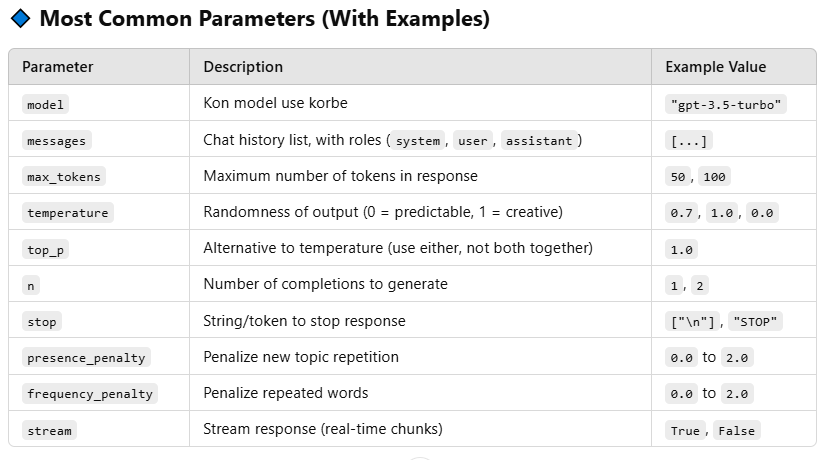

### 🔹 OpenAI ChatCompletion Parameters

---

#### 1. `max_tokens=50`
- **বাংলা**: সর্বোচ্চ ৫০টা token (শব্দ বা শব্দের অংশ) রেসপন্সে দেবে।
- **ব্যবহার**: ছোট উত্তর চাইলে কম, বড় উত্তর চাইলে বেশি দিতে পারো।

---

#### 2. `temperature=0.8`
- **বাংলা**: উত্তর কতটা ক্রিয়েটিভ বা র‍্যান্ডম হবে।
- **ব্যাখ্যা**:
  - `0.0` → খুবই সিরিয়াস এবং প্রেডিক্টেবল উত্তর।
  - `1.0` → বেশি ক্রিয়েটিভ এবং মাঝে মাঝে অপ্রত্যাশিত উত্তর।

---

#### 3. `top_p=1.0`
- **বাংলা**: `temperature` এর মতোই কাজ করে, তবে একটু আলাদা পদ্ধতিতে।
- **ব্যবহার**:
  - `1.0` → পুরোপুরি র‍্যান্ডম অনুমতি।
  - সাধারণত `temperature` বা `top_p` — একটা ব্যবহার করলেই হয়।

---

#### 4. `n=1`
- **বাংলা**: কতগুলো আলাদা উত্তর চাই।
- **উদাহরণ**:
  - `n=1` → ১টি উত্তর দেবে।
  - `n=3` → ৩টি আলাদা আলাদা উত্তর দেবে (list আকারে)।

---

#### 5. `stop=["\n"]`
- **বাংলা**: কোথায় এসে উত্তর থেমে যাবে সেটা বলে দেয়।
- **উদাহরণ**:
  - `"\n"` → নিউ লাইন পেলেই থেমে যাবে।
  - `"STOP"` → "STOP" শব্দ দেখলেই থেমে যাবে।

---

#### 6. `presence_penalty=0.6`
- **বাংলা**: নতুন টপিক নিয়ে কথা বলার প্রবণতা বাড়ায়।
- **ব্যবহার**: বেশি ভ্যালু দিলে একই জিনিস বারবার বলবে না।

---

#### 7. `frequency_penalty=0.5`
- **বাংলা**: একই শব্দ বারবার যেন না আসে, সেটা নিয়ন্ত্রণ করে।
- **ব্যবহার**: বেশি ভ্যালু দিলে রিপিটেড শব্দ কমবে।

In [ ]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Tell me a joke."}
    ],
    max_tokens=50,        # max tokens 50 tokens i will get. 
    temperature=0.8,
    top_p=1.0,
    n=1,                  # The more N I give, the more responses I will get.
    stop=["\n"],
    presence_penalty=0.6,
    frequency_penalty=0.5
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# programming help
prompt = "Give me Python code to add 2 numbers"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Language Translation 
prompt1 = "Translate this sentence to Bengali: I love learning AI."

# OR multi-language practice:
prompt2 = "Translate 'Good morning' into Bengali, Hindi, and German."

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt1},
        {"role": "user", "content": prompt2}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Summarization 
prompt = "Summarize this: Artificial intelligence is a growing field that focuses on..."

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Question-Answering  
prompt = "What is the capital of Germany?"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Tone Change
prompt1 = "Rewrite this sentence in a formal tone: Hey dude, what's up?"

# OR polite tone:
prompt2 = "Make this sentence polite: Give me the report now!"

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt1},
        {"role": "user", "content": prompt2}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Explain Like I’m 24
prompt = "Explain machine learning in a very simple way."

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Language Practice - Bangla, Hindi, German etc..
# Bangla language
prompt1 = "Write a short paragraph about AI in Bengali."

# Hindi language
prompt2 = "Write a short paragraph about AI in Hindi."

# German language
prompt3 = "Write a short paragraph about AI in German."

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt1},
        {"role": "user", "content": prompt2},
        {"role": "user", "content": prompt3}
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

In [ ]:
# Content Creation - Essay / Poem / Story
prompt1 = "Write a short poem about the beauty of nature."

# OR
prompt2 = "Write a short story about a boy who discovers AI."


response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt1},
        {"role": "user", "content": prompt2},
    ],
    temperature=0.7,
    max_tokens=100
)

print(response["choices"][0]["message"]["content"])

## Completion API

### 🔹 OpenAI Completion API Parameters (Bangla Explanation)

---

#### 1. `model`
- **ব্যাখ্যা**: কোন মডেল ব্যবহার করছো (e.g., `text-davinci-003`, `babbage-002`)
- **উদাহরণ**: `model="babbage-002"`

---

#### 2. `prompt`
- **ব্যাখ্যা**: তুমি কী জানতে বা করতে চাইছো, সেই ইনপুট টেক্সট।
- **উদাহরণ**: `prompt="What is Python?"`

---

#### 3. `max_tokens`
- **ব্যাখ্যা**: সর্বোচ্চ কতটি token (শব্দ/অংশ) রেসপন্সে পাবে।
- **উদাহরণ**: `max_tokens=50`

---

#### 4. `temperature`
- **ব্যাখ্যা**: উত্তরের র‍্যান্ডমনেস (0 = সিরিয়াস, 1 = ক্রিয়েটিভ)
- **উদাহরণ**: `temperature=0.7`

---

#### 5. `top_p`
- **ব্যাখ্যা**: আরেকভাবে র‍্যান্ডমনেস কন্ট্রোল করে (1.0 = ফুল র‍্যান্ডম)
- **উদাহরণ**: `top_p=1.0`

---

#### 6. `n`
- **ব্যাখ্যা**: কয়টা আলাদা রেসপন্স চাও।
- **উদাহরণ**: `n=2` → ২টি আলাদা রেসপন্স দিবে

---

#### 7. `stop`
- **ব্যাখ্যা**: কোন word/token পেলে রেসপন্স থামবে।
- **উদাহরণ**: `stop=["\n"]` বা `stop=["END"]`

---

#### 8. `presence_penalty`
- **ব্যাখ্যা**: নতুন কিছু বলার প্রবণতা বাড়ায় (০ থেকে ২ এর মধ্যে)
- **উদাহরণ**: `presence_penalty=0.5`

---

#### 9. `frequency_penalty`
- **ব্যাখ্যা**: একই শব্দ বারবার যেন না আসে, সেটি নিয়ন্ত্রণ করে।
- **উদাহরণ**: `frequency_penalty=0.3`

---

### 🧩 Full Example with All Parameters:
```python
response = openai.Completion.create(
    model="babbage-002",
    prompt="Explain AI in simple terms.",
    max_tokens=100,
    temperature=0.7,
    top_p=1.0,
    n=1,
    stop=["\n"],
    presence_penalty=0.5,
    frequency_penalty=0.3
)

print(response["choices"][0]["text"])

In [ ]:
import openai

In [ ]:
prompt = "What is Python?"

response = openai.Completion.create(
    model="babbage-002",
    prompt=prompt,
    max_tokens=50  # Optional, limits response length
)

print(response["choices"][0]["text"])

In [ ]:
prompt = "What is Python?"

response = openai.Completion.create(
    model="babbage-002",
    prompt=prompt,
    
    max_tokens=50  # Optional, limits response length
    model="babbage-002",
    prompt="Explain AI in simple terms.",
    temperature=0.7,
    top_p=1.0,
    n=1,
    stop=["\n"],
    presence_penalty=0.5,
    frequency_penalty=0.3
)

print(response["choices"][0]["text"])